## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size = 3, activation='relu'),
        layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'),
        layers.Dropout(0.4),
        layers.Conv2D(64, kernel_size = 3, activation='relu'),
        layers.Conv2D(64, kernel_size = 3, activation='relu'),
        layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'),
        layers.Dropout(0.4),
        layers.Conv2D(128, kernel_size = 4, activation='relu'),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax'),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 32)        25632     
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)         

## Train the model

In [ ]:
batch_size = 128
epochs = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
422/422 [==============================] - 196s 463ms/step - loss: 0.3138 - accuracy: 0.9011 - val_loss: 0.0486 - val_accuracy: 0.9868
Epoch 2/30
422/422 [==============================] - 194s 459ms/step - loss: 0.0864 - accuracy: 0.9746 - val_loss: 0.0387 - val_accuracy: 0.9897
Epoch 3/30
422/422 [==============================] - 194s 461ms/step - loss: 0.0664 - accuracy: 0.9809 - val_loss: 0.0305 - val_accuracy: 0.9908
Epoch 4/30
422/422 [==============================] - 193s 458ms/step - loss: 0.0512 - accuracy: 0.9847 - val_loss: 0.0265 - val_accuracy: 0.9915
Epoch 5/30
422/422 [==============================] - 193s 458ms/step - loss: 0.0441 - accuracy: 0.9869 - val_loss: 0.0236 - val_accuracy: 0.9935
Epoch 6/30
422/422 [==============================] - 193s 457ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0263 - val_accuracy: 0.9933
Epoch 7/30
422/422 [==============================] - 194s 459ms/step - loss: 0.0343 - accuracy: 0.9901 - val_loss: 0.0244 -

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022399434819817543
Test accuracy: 0.9952999949455261


In [ ]:
model.save('')

In [ ]:
model = keras.models.load_model('./')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 32)        25632     
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)         

In [ ]:
hwData = np.fromfile("xTest2.bin",  dtype=np.uint8)
hwData = np.reshape(hwData,(10000,28, 28, 1))
index = 0;
for i in hwData:
  hwData[index] = np.rot90(np.fliplr(i))
  index += 1
np.shape(hwData)

(10000, 28, 28, 1)

In [ ]:
hwOutput = model.predict_on_batch(hwData)
result = np.argmax(hwOutput ,axis=1)
print(result)

[4 9 1 ... 8 5 0]


In [ ]:
np.savetxt("classifications.csv",result,fmt='%i',delimiter=",")

In [ ]:
hwDataBin = np.fromfile("xTest2.bin",  dtype=np.uint8)
hw_train_1 = np.reshape(hwDataBin,(10000,28,28))
index = 0;
for i in hw_train_1:
  hw_train_1[index] = np.rot90(np.fliplr(i))
  index += 1

np.shape(hw_train_1)

(10000, 28, 28)

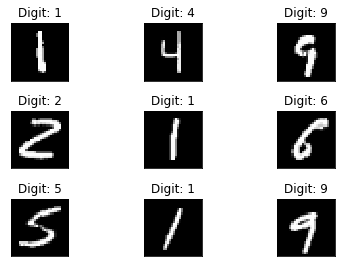

In [ ]:
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
fig = plt.figure()
startingIndex = 1033

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(hw_train_1[startingIndex+i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(result[startingIndex+i]))
  plt.xticks([])
  plt.yticks([])
fig